In [71]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [72]:
digits.data.shape #Instances , Attributes

(1797, 64)

7


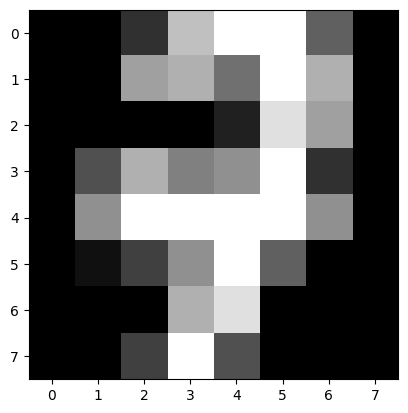

In [73]:
import matplotlib.pyplot as plt
numberInstances = 52
imageInstances = digits.images[numberInstances]
targetInstances = digits.target[numberInstances]
print(targetInstances)
plt.gray()
plt.imshow(imageInstances)
plt.show()

## Preprocess

In [74]:
from sklearn.model_selection import train_test_split
Feature_train,Feature_test,Label_train,Label_test = train_test_split(digits.data , digits.target , test_size=0.3)

In [75]:
print(Feature_train[0])

[ 0.  0.  3. 11. 16. 13.  0.  0.  0.  3. 15. 15. 13. 16.  0.  0.  0.  6.
  8.  2.  9. 14.  0.  0.  0.  0.  4.  7. 15. 14.  5.  0.  0.  4. 16. 16.
 16. 14.  6.  0.  0.  1.  8. 13. 12.  0.  0.  0.  0.  0.  1. 16.  4.  0.
  0.  0.  0.  0.  3. 15.  1.  0.  0.  0.]


In [76]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features to [0, 1] range using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0 , 1))
Feature_train = scaler.fit_transform(Feature_train)
Feature_test = scaler.transform(Feature_test)

In [77]:
print(Feature_train[0])

[0.         0.         0.1875     0.6875     1.         0.8125
 0.         0.         0.         0.21428571 0.9375     0.9375
 0.8125     1.         0.         0.         0.         0.375
 0.5        0.125      0.5625     0.875      0.         0.
 0.         0.         0.25       0.4375     0.9375     0.875
 0.33333333 0.         0.         0.28571429 1.         1.
 1.         0.875      0.42857143 0.         0.         0.0625
 0.5        0.8125     0.75       0.         0.         0.
 0.         0.         0.0625     1.         0.25       0.
 0.         0.         0.         0.         0.1875     0.9375
 0.0625     0.         0.         0.        ]


## Performance metric

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test):
    """
    Calculate and print evaluation metrics for classification model
    
    Args:
        Label_train: Actual labels of training set
        Label_test: Actual labels of test set
        Label_pred_train: Predicted labels for training set
        Label_pred_test: Predicted labels for test set
    
    Returns:
        Tuple of (train_accuracy, test_accuracy, precision, recall)
    """
    
    # Calculate accuracy for both train and test sets
    acc_train = accuracy_score(y_true=Label_train, y_pred=Label_pred_train)  # (TP + TN) / Total
    acc_test = accuracy_score(y_true=Label_test, y_pred=Label_pred_test)    # (TP + TN) / Total
    
    # Calculate precision and recall for test set only
    precision = precision_score(y_true=Label_test, y_pred=Label_pred_test , average='weighted')  # TP / (TP + FP)
    recall = recall_score(y_true=Label_test, y_pred=Label_pred_test , average='weighted')        # TP / (TP + FN)
    
    # Print formatted results
    print(f"Train Accuracy: {acc_train:.6f}  , Test Accuracy: {acc_test:.6f}\n"
          f"Precision:      {precision:.6f}  , Recall:        {recall:.6f}")
    
    return acc_train, acc_test, precision, recall

# Classification    

## 1.Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( max_depth=128 , n_estimators=256)
rf.fit(Feature_train , Label_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [80]:
# Generate predictions using trained Random Forest model
Label_pred_train = rf.predict(Feature_train)
Label_pred_test = rf.predict(Feature_test)

acc_train_rf, acc_test_rf, precision_rf, recall_rf = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 1.000000  , Test Accuracy: 0.975926
Precision:      0.975909  , Recall:        0.975926


## 2.SVM

In [81]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(Feature_train , Label_train)


SVC(kernel='poly')

In [82]:
# Generate predictions using trained SVM model
Label_pred_train = svm.predict(Feature_train)
Label_pred_test = svm.predict(Feature_test)

acc_train_svm, acc_test_svm, precision_svm, recall_svm = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.999204  , Test Accuracy: 0.985185
Precision:      0.985358  , Recall:        0.985185


## 3.ANN

In [83]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256,solver='adam',batch_size=64)
ann.fit(Feature_train , Label_train)


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [84]:
# Generate predictions using trained ANN model
Label_pred_train = ann.predict(Feature_train)
Label_pred_test = ann.predict(Feature_test)

acc_train_ann, acc_test_ann, precision_ann, recall_ann = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 1.000000  , Test Accuracy: 0.974074
Precision:      0.975013  , Recall:        0.974074


## 4. KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree',leaf_size=28)
knn.fit(Feature_train , Label_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [86]:
# Make predictions using trained KNN model
Label_pred_train = knn.predict(Feature_train)
Label_pred_test = knn.predict(Feature_test)

# Evaluate model performance metrics
acc_train_knn, acc_test_knn, precision_knn, recall_knn = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.984885  , Test Accuracy: 0.977778
Precision:      0.977771  , Recall:        0.977778
